# RFT against pKLD(COCONUT/ZINC) profile using ECFP4

In [365]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import numpy as np

from ast import literal_eval
import re
import sys
sys.path.insert(0,"./../fip3")
from fip import profiles
import numpy as np
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from matplotlib.pyplot import figure
from scipy import interp

## Relative feature tightness against a pKLD(COCONUT/ZINC) interrelation profile

In [366]:
joint_samples0 = pd.read_csv('../data/RTF/joint_samples0.csv', delimiter = ' ')
joint_samples1 = pd.read_csv('../data/RTF/joint_samples1.csv', delimiter = ' ')
joint_samples2 = pd.read_csv('../data/RTF/joint_samples2.csv', delimiter = ' ')
joint_samples3 = pd.read_csv('../data/RTF/joint_samples3.csv', delimiter = ' ')
joint_samples4 = pd.read_csv('../data/RTF/joint_samples4.csv', delimiter = ' ')
joint_samples5 = pd.read_csv('../data/RTF/joint_samples5.csv', delimiter = ' ')
joint_samples6 = pd.read_csv('../data/RTF/joint_samples6.csv', delimiter = ' ')
joint_samples7 = pd.read_csv('../data/RTF/joint_samples7.csv', delimiter = ' ')
joint_samples8 = pd.read_csv('../data/RTF/joint_samples8.csv', delimiter = ' ')
joint_samples9 = pd.read_csv('../data/RTF/joint_samples9.csv', delimiter = ' ')

In [270]:
plt.rcParams['font.size'] = '13'

<AxesSubplot:xlabel='RFT', ylabel='Density'>

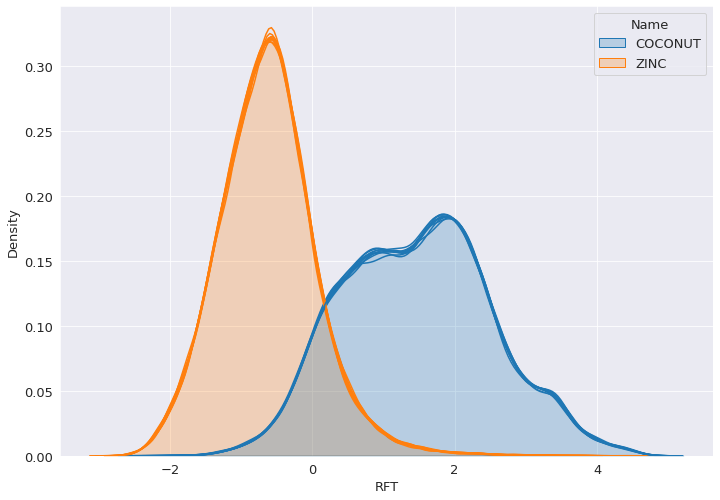

In [271]:
a4_dims = (11.7, 8.27)
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.kdeplot(data=joint_samples0, x="RFT", hue="Name")
sns.kdeplot(data=joint_samples1, x="RFT", hue="Name")
sns.kdeplot(data=joint_samples2, x="RFT", hue="Name")
sns.kdeplot(data=joint_samples3, x="RFT", hue="Name")
sns.kdeplot(data=joint_samples4, x="RFT", hue="Name")
sns.kdeplot(data=joint_samples5, x="RFT", hue="Name")
sns.kdeplot(data=joint_samples6, x="RFT", hue="Name")
sns.kdeplot(data=joint_samples7, x="RFT", hue="Name")
sns.kdeplot(data=joint_samples8, x="RFT", hue="Name")
sns.kdeplot(data=joint_samples9, x="RFT", hue="Name", fill= True)

# ROC curves for ECFP4 features

In [438]:
fpr0, tpr0, thresholds0 = metrics.roc_curve(joint_samples0['Name'], joint_samples0['RFT'], pos_label = 'COCONUT')
fpr1, tpr1, thresholds1 = metrics.roc_curve(joint_samples1['Name'], joint_samples1['RFT'], pos_label = 'COCONUT')
fpr2, tpr2, thresholds2 = metrics.roc_curve(joint_samples2['Name'], joint_samples2['RFT'], pos_label = 'COCONUT')
fpr3, tpr3, thresholds3 = metrics.roc_curve(joint_samples3['Name'], joint_samples3['RFT'], pos_label = 'COCONUT')
fpr4, tpr4, thresholds4 = metrics.roc_curve(joint_samples4['Name'], joint_samples4['RFT'], pos_label = 'COCONUT')
fpr5, tpr5, thresholds5 = metrics.roc_curve(joint_samples5['Name'], joint_samples5['RFT'], pos_label = 'COCONUT')
fpr6, tpr6, thresholds6 = metrics.roc_curve(joint_samples6['Name'], joint_samples6['RFT'], pos_label = 'COCONUT')
fpr7, tpr7, thresholds7 = metrics.roc_curve(joint_samples7['Name'], joint_samples7['RFT'], pos_label = 'COCONUT')
fpr8, tpr8, thresholds8 = metrics.roc_curve(joint_samples8['Name'], joint_samples8['RFT'], pos_label = 'COCONUT')
fpr9, tpr9, thresholds9 = metrics.roc_curve(joint_samples9['Name'], joint_samples9['RFT'], pos_label = 'COCONUT')

In [428]:
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

tprs.append(np.interp(mean_fpr, fpr0, tpr0))
tprs.append(np.interp(mean_fpr, fpr1, tpr1))
tprs.append(np.interp(mean_fpr, fpr2, tpr2))
tprs.append(np.interp(mean_fpr, fpr3, tpr3))
tprs.append(np.interp(mean_fpr, fpr4, tpr4))
tprs.append(np.interp(mean_fpr, fpr5, tpr5))
tprs.append(np.interp(mean_fpr, fpr6, tpr6))
tprs.append(np.interp(mean_fpr, fpr7, tpr7))
tprs.append(np.interp(mean_fpr, fpr8, tpr8))
tprs.append(np.interp(mean_fpr, fpr9, tpr9))
aucs.append(auc(fpr0, tpr0))
aucs.append(auc(fpr1, tpr1))
aucs.append(auc(fpr2, tpr2))
aucs.append(auc(fpr3, tpr3))
aucs.append(auc(fpr4, tpr4))
aucs.append(auc(fpr5, tpr5))
aucs.append(auc(fpr6, tpr6))
aucs.append(auc(fpr7, tpr7))
aucs.append(auc(fpr8, tpr8))
aucs.append(auc(fpr9, tpr9))

In [416]:
aucs

[0.9570174842779203,
 0.9562014473119793,
 0.9560570636077426,
 0.9559718473191903,
 0.9556354859076259,
 0.9561114684637305,
 0.9561873299583585,
 0.9564956417693038,
 0.9566962619236727,
 0.9554078077913308]

In [ ]:
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)

<Figure size 432x288 with 0 Axes>

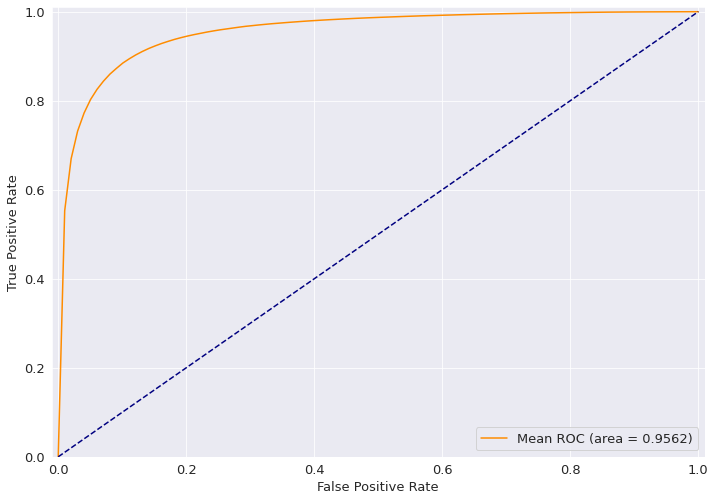

In [ ]:
plt.figure()
figure(figsize=(11.7, 8.27))
plt.plot(mean_fpr,mean_tpr,color="darkorange",label= "Mean ROC (area = %0.4f)" %mean_auc)
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

<Figure size 432x288 with 0 Axes>

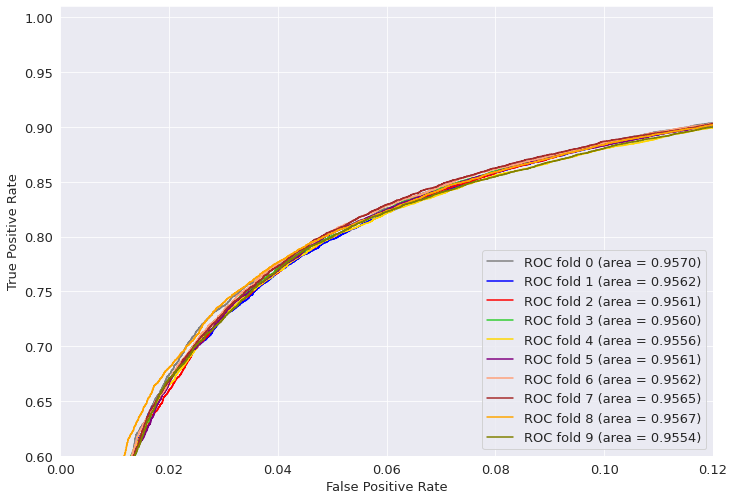

In [452]:
plt.figure()
figure(figsize=(11.7, 8.27))
plt.plot(fpr0,tpr0,color="grey", linestyle= 'solid', label =  "ROC fold 0 (area = %0.4f)" % metrics.auc(fpr0, tpr0) )
plt.plot(fpr1,tpr1,color="blue", linestyle= 'solid', label =  "ROC fold 1 (area = %0.4f)" % metrics.auc(fpr1, tpr1) )
plt.plot(fpr2,tpr2,color="red", linestyle= 'solid', label =   "ROC fold 2 (area = %0.4f)" % metrics.auc(fpr2, tpr2) )
plt.plot(fpr3,tpr3,color="limegreen", linestyle= 'solid', label = "ROC fold 3 (area = %0.4f)" % metrics.auc(fpr3, tpr3)  )
plt.plot(fpr4,tpr4,color="gold", linestyle= 'solid', label ="ROC fold 4 (area = %0.4f)" % metrics.auc(fpr4, tpr4)  )
plt.plot(fpr5,tpr5,color="purple", linestyle= 'solid', label ="ROC fold 5 (area = %0.4f)" % metrics.auc(fpr5, tpr5)  )
plt.plot(fpr6,tpr6,color="lightsalmon", linestyle= 'solid', label ="ROC fold 6 (area = %0.4f)" % metrics.auc(fpr6, tpr6)  )
plt.plot(fpr7,tpr7,color="brown", linestyle= 'solid',label =  "ROC fold 7 (area = %0.4f)" % metrics.auc(fpr7, tpr7) )
plt.plot(fpr8,tpr8,color="orange", linestyle= 'solid', label =  "ROC fold 8 (area = %0.4f)" % metrics.auc(fpr8, tpr8) )
plt.plot(fpr9,tpr9,color="olive", linestyle= 'solid', label =  "ROC fold 9 (area = %0.4f)" % metrics.auc(fpr9, tpr9) )
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.ylim(0.6, 1.01)
plt.xlim(0, 0.12)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show();

In [451]:
plt.rcParams['font.size'] = '13'